In [70]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [72]:
Email_dataset=pd.read_csv("/content/drive/My Drive/DataSet/Spam.txt",sep=",",header=None)
## Change The Column Names
Email_dataset.columns=["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
Email_dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [73]:
## Checking Null Values -->
print("Null Values Total --> " ,Email_dataset.isna().sum().sum())
print("Desc of The Data set \n\n",Email_dataset.describe())

Null Values Total -->  0
Desc of The Data set 

        word_freq_make  word_freq_address  ...  capital_run_length_total         spam
count     4601.000000        4601.000000  ...               4601.000000  4601.000000
mean         0.104553           0.213015  ...                283.289285     0.394045
std          0.305358           1.290575  ...                606.347851     0.488698
min          0.000000           0.000000  ...                  1.000000     0.000000
25%          0.000000           0.000000  ...                 35.000000     0.000000
50%          0.000000           0.000000  ...                 95.000000     0.000000
75%          0.000000           0.000000  ...                266.000000     1.000000
max          4.540000          14.280000  ...              15841.000000     1.000000

[8 rows x 58 columns]


In [0]:
## Doing Scaling --> Capital Length Having Big values ,going to affect our result ,The difference is affecting our models
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()

ScaledEmail=pd.DataFrame(Sc.fit_transform(Email_dataset.drop("spam",axis=1)))
ScaledEmail.columns=Email_dataset.drop("spam",axis=1).columns





In [75]:
Features=ScaledEmail
target=Email_dataset["spam"]

x_train,x_test,y_train,y_test=train_test_split(Features,target,random_state=42,test_size=0.2)
print( "Shape : " ,x_train.shape , x_test.shape , y_train.shape , y_test.shape )
print( "Mean  : " , y_train.mean() , y_test.mean() )

Shape :  (3680, 57) (921, 57) (3680,) (921,)
Mean  :  0.38668478260869565 0.4234527687296417


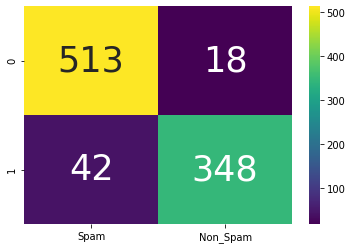

In [76]:
model=SVC( C = 1 , random_state= 42 )
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
matrix=pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=y_pred),columns=["Spam","Non_Spam"])
sns.heatmap(data=matrix,cmap="viridis",annot=True \
            ,fmt=".0f",annot_kws={"size":35},)

In [0]:
def Plot_Classification_report( cr , title ,cmap):
  lines = cr.split("\n")
  classes=[]
  plot=[]
  
  for line in lines[ 2:(len(lines)-3)]:
    t = line.split()
    if(t!=[] ):
      if(t[0] != 'accuracy'):
        classes.append(t[0])
        v=[float(numb) for numb in t[ 1 : 4 ] ]
        plot.append(v)
      else:
        print("Accuracy" ,t[1])  

  plt.xticks([1,2])   
  plt.title(title)
  plt.ylabel("Classes")
  plt.xlabel("Measures")   
  sns.heatmap(plot,cmap=cmap,annot=True)
  x_tick_marks = np.arange(3)
  y_tick_marks = np.arange(len(classes))
  plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'],horizontalalignment='left')
  plt.yticks(y_tick_marks, classes)
  plt.show()
  
 



In [0]:
cr=classification_report(y_test,y_pred)

Accuracy 0.93


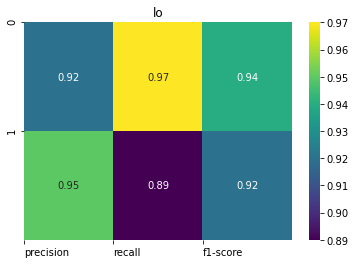

In [79]:
 Plot_Classification_report(cr,"lo","viridis")

In [80]:
## Tuning Hyperparameters 
folds=KFold(n_splits = 5 , shuffle = True ,random_state=42)

hyper_params={"C":[1e-4,1e-3,1e-2,1e-1,1,10,100,1000] , 
              "gamma":[1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]  }
model=SVC(kernel="rbf",random_state=42)
model_cv=GridSearchCV(estimator=model,param_grid=hyper_params \
                      ,scoring="accuracy"
                      ,verbose=True,
                      cv=folds,
                      return_train_score=True)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  8.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07,
                                   1e-08, 1e-09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=True)

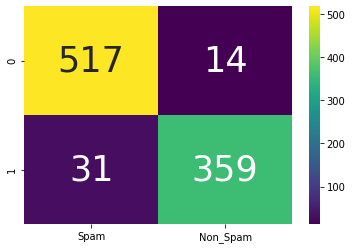

In [81]:
cv_Data=pd.DataFrame(model_cv.cv_results_)
y_pred=model_cv.predict(x_test)
matrix=pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=y_pred),columns=["Spam","Non_Spam"])
sns.heatmap(data=matrix,cmap="viridis",annot=True \
            ,fmt=".0f",annot_kws={"size":35},)

Accuracy 0.95


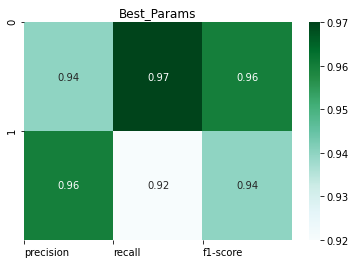

The Params -->  {'C': 1000, 'gamma': 0.001}


In [92]:
Plot_Classification_report(classification_report(y_test,y_pred),"Best_Params","BuGn")
print("The Params --> ",model_cv.best_params_)

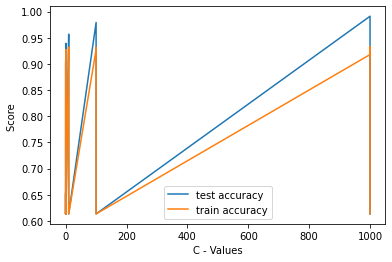

In [93]:

plt.plot(cv_Data["param_C"],cv_Data["mean_train_score"])
plt.plot(cv_Data["param_C"],cv_Data["mean_test_score"])
plt.xlabel("C - Values")
plt.ylabel("Score ")
plt.legend(['test accuracy', 'train accuracy'], loc="best")
plt.show()

In [0]:
## LOL